# 🧹 Step 2 - Data Analysis and Visualization

## 📚 Course 4: Data Cleaning and Analysis

## 5️⃣ Working with missing and duplicate Data

---

👦 [Anh-Thi DINH](https://dinhanhthi.com) — 🔥 [dataquest-aio](https://github.com/dinhanhthi/dataquest-aio) on Github — 🌏 [Dataquest](https://dataquest.io/)

⚡ **Note**: Some errors in this notebook appear intentionally to illustrate the wrong commands.

❓ You run this notebook on Google Colab? If "Yes", please replace `0` by `1` in the below cell and run it first.

In [1]:
use_colab = 0 # 1 if you use Google Colab to read/run this notebook

## 📝 Mission 347

⏬ Download the takeaway for this mission in folder `/takeaways/` [on Github](https://github.com/dinhanhthi/dataquest-aio/tree/master/takeaways). [Source](https://app.dataquest.io/m/347/working-with-missing-and-duplicate-data) of this mission.

In [2]:
import pandas as pd # import pandas package
import numpy as np
import matplotlib.pyplot as plt # plot

# show the plots inside the notebook
%matplotlib inline

In [45]:
# Below codes are only for displaying multiple dataframes side-by-side, it's not a part of this lesson!
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [3]:
# datasets' location
if use_colab:
    dataquest_aio = 'https://raw.githubusercontent.com/dinhanhthi/dataquest-aio/master/step-2-data-analysis-and-visualization/'
    wh_2015_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/wh_2015.csv'
    wh_2016_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/wh_2016.csv'
    wh_2017_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/wh_2017.csv'
else: # if you use localhost
    wh_2015_url = './data/wh_2015.csv'
    wh_2016_url = './data/wh_2016.csv'
    wh_2017_url = './data/wh_2017.csv'

In [4]:
# read datasets
happiness2015 = pd.read_csv(wh_2015_url)
happiness2016 = pd.read_csv(wh_2016_url)
happiness2017 = pd.read_csv(wh_2017_url)

In [5]:
# take a look
display(happiness2015.head())
display(happiness2016.head())
display(happiness2017.head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [6]:
# get dfs' shapes
display(happiness2015.shape)
display(happiness2016.shape)
display(happiness2016.shape)

(164, 13)

(164, 14)

(164, 14)

They have the same number of rows (164).

### Missing values

In [7]:
# Check row 158
happiness2015.iloc[158].to_frame().reset_index()  

,index,158
0,Country,Belize
1,Region,NaN
2,Happiness Rank,NaN
3,Happiness Score,NaN
4,Standard Error,NaN
5,Economy (GDP per Capita),NaN
6,Family,NaN
7,Health (Life Expectancy),NaN
8,Freedom,NaN
9,Trust (Government Corruption),NaN


There are a lot of `NaN` values (missing values).

💡 **Remark**: It's good to note that pandas will not automatically identify values such as `n/a`, `-`, or `--` as `NaN` or `None`, but they may also indicate data is missing. To indicate what is "missing" when read dataset, we can use,

~~~ python
moto = pd.read_csv("test.csv", na_values=['none']) # "none" is used as missing data instead of NaN or None
~~~

In [8]:
# show df with only missing data in the column "Happiness Score"
happiness2015[happiness2015['Happiness Score'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [9]:
# the number of missing values in each column of happiness2015
happiness2015.isnull().sum().sort_values(ascending=False)

Dystopia Residual                6
Generosity                       6
Trust (Government Corruption)    6
Freedom                          6
Health (Life Expectancy)         6
Family                           6
Economy (GDP per Capita)         6
Standard Error                   6
Happiness Score                  6
Happiness Rank                   6
Region                           6
Year                             0
Country                          0
dtype: int64

In [10]:
# the number of missing values in each column of happiness2016
happiness2016.isnull().sum().sort_values(ascending=False)

Dystopia Residual                7
Generosity                       7
Trust (Government Corruption)    7
Freedom                          7
Health (Life Expectancy)         7
Family                           7
Economy (GDP per Capita)         7
Upper Confidence Interval        7
Lower Confidence Interval        7
Happiness Score                  7
Happiness Rank                   7
Region                           7
Year                             0
Country                          0
dtype: int64

In [11]:
# the number of missing values in each column of happiness2017
happiness2017.isnull().sum().sort_values(ascending=False)

Dystopia.Residual                9
Trust..Government.Corruption.    9
Generosity                       9
Freedom                          9
Health..Life.Expectancy.         9
Family                           9
Economy..GDP.per.Capita.         9
Whisker.low                      9
Whisker.high                     9
Happiness.Score                  9
Happiness.Rank                   9
Year                             0
Country                          0
dtype: int64

From 3 datasets, there are ony `Year` and `Country` not having missing values.

### Clean the column names

Let's try combining 3 datasets together,

In [13]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort='True')
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

We can see, there are many columns which shoule be the same but they are considered differently because of a little difference on their name, e.g. 

- `Dystopia Residual` and `Dystopia.Residual`
- `Economy (GDP per Capita)` and `Economy..GDP.per.Capita.`
- `Health (Life Expectancy)` and `Health..Life.Expectancy.`
- `Trust (Government Corruption)` and `Trust..Government.Corruption.`
- and so on

That's why we need to update the column names to make them uniform and combine the dataframes again.

💡 Using the [methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary) given with `Series.str.` to work with text data. Note that, we need to use these methods with [Regular Expression in Python](https://docs.python.org/3/library/re.html).

In [25]:
# replace '.' with space ' ', 
#  then replace one or several spaces with a single space ' ', 
#  then uppercase all string
happiness2017.columns = happiness2017.columns\
                            .str.replace('.', ' ')\
                            .str.replace('\s+', ' ')\
                            .str.strip().str.upper()

# remove '(' and ')',
#  then remove spaces at the beginning and at the end of str
#  then uppercase
happiness2015.columns = happiness2015.columns\
                            .str.replace(r'[\(\)]', '')\
                            .str.strip()\
                            .str.upper()

happiness2016.columns = happiness2016.columns.str.replace(r'[\(\)]', '').str.strip().str.upper()

# combine again
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

There are still missing values.

In [26]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015


### Visualize missing values

We can visualize the location of missing values by using [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) given by seaborn library.

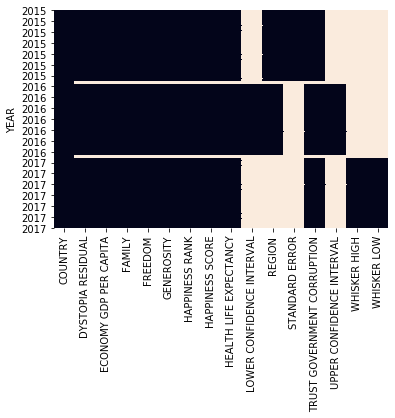

In [27]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

All missing values are in light gray color. From above heatmap, we can know that, for example, 

- The missing values of year 2018 are in columns `LOWER CONF...`, `REGION` and `STANDARD ERROR`.
- No values are missing in the `COUNTRY` column.
- There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the `COUNTRY` column.
- Some columns only have data populated for one year.
- It looks like the `REGION` data is missing for the year 2017.

### Handle missing values?

There are some ways to handle with missing values:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

For example, look at the `REGION` columns. There is only 2017 having missing values whereas we have enough data for 2015 and 2016. Moreover, regions of a country won't change in near years. We can use these 2 years for fill missing values in 2017. 

In [40]:
pd.merge(happiness2015, happiness2016, on=['COUNTRY', 'REGION']).isnull().sum()

COUNTRY                          0
REGION                           0
HAPPINESS RANK_x                 0
HAPPINESS SCORE_x                0
STANDARD ERROR                   0
ECONOMY GDP PER CAPITA_x         0
FAMILY_x                         0
HEALTH LIFE EXPECTANCY_x         0
FREEDOM_x                        0
TRUST GOVERNMENT CORRUPTION_x    0
GENEROSITY_x                     0
DYSTOPIA RESIDUAL_x              0
YEAR_x                           0
HAPPINESS RANK_y                 0
HAPPINESS SCORE_y                0
LOWER CONFIDENCE INTERVAL        0
UPPER CONFIDENCE INTERVAL        0
ECONOMY GDP PER CAPITA_y         0
FAMILY_y                         0
HEALTH LIFE EXPECTANCY_y         0
FREEDOM_y                        0
TRUST GOVERNMENT CORRUPTION_y    0
GENEROSITY_y                     0
DYSTOPIA RESIDUAL_y              0
YEAR_y                           0
dtype: int64

In [ ]:
# df contains all of the countries and corresponding regions from 2015 and 2016
regions = 

combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined = combined.drop('REGION_x', axis = 1)
missing = combined.isnull().sum()

In [70]:
names = ['A', 'E', 'C', 'D', 'B']
ages =  [1, 3, 'NaN', 'NaN', 2]

my_dict = {'Name':names, 'Ages':ages}
df1 = pd.DataFrame(my_dict)

names = ['A', 'B', 'C', 'F', 'E']
ages =  [1, 2, -3, -4, 'NaN']

my_dict = {'Name':names, 'Ages':ages}
df2 = pd.DataFrame(my_dict)

display_side_by_side(df1, df2)

,Name,Ages
0,A,1
1,E,3
2,C,NaN
3,D,NaN
4,B,2
,Name,Ages
0,A,1
1,B,2
2,C,-3
3,F,-4


In [60]:
pd.merge(df1, df2, on="Name")

,Name,Ages_x,Marks_x,Ages_y,Marks_y
0,A,1,6,1,-6
1,B,2,7,2,-7
2,C,NaN,8,-3,-8


In [61]:
pd.merge(df1, df2, on=["Name", 'Ages'])

,Name,Ages,Marks_x,Marks_y
0,A,1,6,-6
1,B,2,7,-7


In [62]:
pd.merge(df1, df2, how="right", on=["Name", 'Ages'])

,Name,Ages,Marks_x,Marks_y
0,A,1.0,6,-6
1,B,2.0,7,-7
2,C,-3.0,NaN,-8
3,F,-4.0,NaN,-9


In [71]:
df2.combine_first(df1)

,Name,Ages
0,A,1
1,B,2
2,C,-3
3,F,-4
4,E,NaN
